<a href="https://colab.research.google.com/github/hsarfraz/Tiny-Machine-Learning/blob/main/0_2_Mimimizing_Loss_Function_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Introduction**

I am now going to dive deeper into the loss function and talk about how we should train a machine learning model to reduce loss.

*  **Note:** When I talk about training a machine learning model I am referring to the process where a machine learning algorithm is given training data to learn.  

In the [previous tutorial](https://github.com/hsarfraz/Tiny-Machine-Learning/blob/main/Linear_Regressions_%26_Loss_Functions.ipynb) I talked about how ***linear regressions*** are a type of supervised machine learning algorithm and how ***loss functions*** let us know if our machine learning model succesfully learned from its training and can predict the real y outputs when given training data.

But in the previous tutorial I only ran two trials and had to manualy change my guess of the values to plug into the slope-intercept form (slope and y-intercept). This time I want to perform multiple tests and map out the losses that I received during these trials.

---
#### **Gradients and Differentiation**

The graph of the losses will be a parabola (gradient). The derivative of each point will let us know if our loss is getting closer to zero or not. This means that the ideal point that we want to be on is the vertex since the derivative at the vertex is zero.

When performing multiple loss function trials the derivative of each point on the loss function curve is calculated. Then a new guess is made by the machine learning algorithm to reduce the loss. I have included a sample graph of the loss function below.

In [1]:
# First import the functions we will need
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Text(0, 0, 'Vertex')

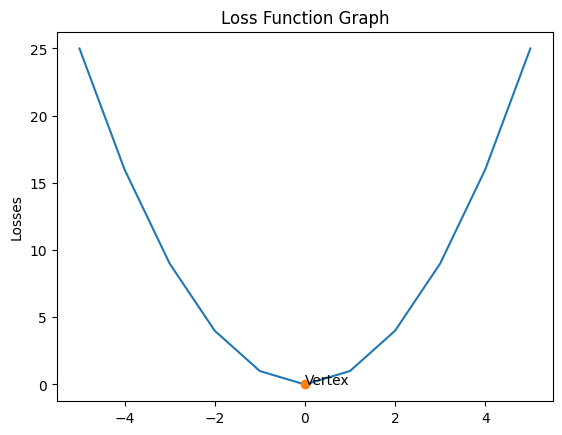

In [2]:
x = []
y = []
for i in range(-5,6):
  x.append(i)
  y.append(i**2)
  ## printing index
  #print(i) #output: -5,-4,-3,-2,-1,0,1,2,3,4,5
plt.plot(x,y,
         0,0, 'o')
plt.title('Loss Function Graph')
plt.ylabel('Losses')
plt.text(0,0, 'Vertex',va='baseline', ha='left')

---
#### **Writing the code to perform the trials to mimimize the loss**

In [3]:
# This script requires TensorFlow 2 and Python 3.
if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))


# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

---
#### Explaining the `INITIAL_W` and `INITIAL_B` Variables
*   `INITIAL_W = 10` represents the slope or the $\beta_1$ variable from the **slope-intercept formula ($Y_i = (\beta_1*X_i) + \beta_0$)** covered in the [last tutorial](https://github.com/hsarfraz/Tiny-Machine-Learning/blob/main/Linear_Regressions_%26_Loss_Functions.ipynb)
*   `INITIAL_B = 10` represents the y-intercept or the $\beta_0$ variable from the slope-intercept formula
  *    `INITIAL_W` and `INITIAL_B` will be changed by the machine learning algorithm as more trials occur. Right now I am stating a initial guess and want the linear regression model to repeat the trials many times to give me the correct result
*  **Observations**: I noticed that increasing the `INITIAL_W` and `INITIAL_B` variables by a higher number would not help the machine learning algorithm in identifying the correct answer. I would also need to **increase** the number of epochs/trials to get the correct `INITIAL_W` and `INITIAL_B` values.

In [4]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

---
#### Explaining the `loss(predicted_y, target_y)` function
*  To re-cap, in the [last tutorial](https://github.com/hsarfraz/Tiny-Machine-Learning/blob/main/Linear_Regressions_%26_Loss_Functions.ipynb) I described the linear regression process and how the slope-intercept formula [ $Y_i = (\beta_1*X_i) + \beta_0$ ] is used to calculate our **predicted y-values**. The `Model(object)` class (which I will talk about later) already calculates the predicted y-values.
*   The `loss()` function does the next step which is to calculate the **total loss** to indicate our guess accuracy. **NOTE:** In the [last tutorial](https://github.com/hsarfraz/Tiny-Machine-Learning/blob/main/Linear_Regressions_%26_Loss_Functions.ipynb) I calculated the total loss by using the square root. This time I am using the **Mean Squared Error (MSE)** loss function which calculated the loss through the mean. Here is the Mean Square Error Formula:

##### <center><ins>**Mean Square Error Formula**</ins></center>

$$
Loss = {1 \over n} \sum_{i=0}^{n}{(y_i-\hat y_i)^2}
$$
   *  $n$ represents the total count of the numbers (of differences) in the list. So nothing is added, only the numbers in the list are counted
   *  $y_i$ represents our target values (actual y values) that the machine learning algorithm needs to calculate
   *  $\hat y_i$ represents the predicted y values (the guesses)

##### >>> Explaining the Code
*  `predicted_y` represents the predicted y-values which are calculated using the `model()` class
*  `target_y` represents the target/actual y-values which are the values in the `ys` variable/list
*  `tf.square()` and `tf.reduce_mean()` are mathematical functions used on tensors. I am using tensors since they are used to train neural networks and make training easier on complex data sets.

In [5]:
# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y)), predicted_y - target_y

---
#### Explaining the `train(model, inputs, outputs, learning_rate)` function

*  `model` represents the `Model(object)` class
*  `inputs` represents the independent variables or predictors (the `xs` variable)
*  `outputs` represents the target values (the `ys` variable). These are the values that are on the line of best fit and need to outputted by the linear regression model
*  `learning_rate` is the tuning parameter in an optimization algorithm that determines the "step size" of each iteration/epoch. The goal of the stepsize is to go towards the minimum of a loss function (where the derivative = 0) at each iteration while moving toward a minimum of a loss function

In [6]:
# Define our training procedure
def train(model, inputs, outputs, learning_rate): #`inputs` = x-values (independent variable) || `outputs` = y-values (dependent variable)
  with tf.GradientTape() as t: # `tf.GradientTape()` is an API provided by tensorflow to perform automatic differentiation

    current_loss, y_difference = loss(model(inputs), outputs)
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values (the INITIAL_W & INITIAL_B values) based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return [current_loss,y_difference]

---
#### Explaing the `Model(object)` Class

*  `def __init__(self):` is a function that will call itself and will only run once when the `Model()` class is called. If the class is called a second or third time then this function will not be called
*  `def __call__(self,x):` is a function that will call itself only after the `Model()` class is called for a second, third, fourth, etc time

In [7]:
# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

### Train our model

In [25]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.1

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50) #defining the number of trials (epoches) to run
losses = []
epochs_iterations = []
y_difference_list =[]

for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss, y_difference = train(model, xs, ys, learning_rate=LEARNING_RATE)

  ### I am appending the loss results, epoch iterations, y value differences lists that I will use later on in my graphs
  losses.append(current_loss)
  epochs_iterations.append(epoch)
  y_difference_list.append(y_difference)
  ####
  #print(epoch)

  if epoch == 0:
    print('Printing the first 5/50 Epochs')
    print('---------------------------')
  if epoch < 5:
    # `:2d` specifies the number of spaces between the sentence and output/variable
    # `1.2f` has two arguments. The 1 specifies the number of spaces between the sentence and output/variable. The 2 specifies the amount of decimal spaces for that number
    print(f"Epoch {epoch:2d}: w={list_w[-1]:1.2f} b={list_b[-1]:1.2f}, "f"loss={current_loss:2.5f}")


Printing the first 5/50 Epochs
---------------------------
Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=-1.57 b=5.40, loss=38.20575
Epoch  2: w=0.20 b=5.19, loss=21.63014
Epoch  3: w=0.20 b=4.49, loss=17.24073
Epoch  4: w=0.41 b=3.93, loss=13.86214


### Plot our trained values over time

This graph shows how the values of `w` and `b` (the slope and y-intercept) get closer to the answer as more epochs occur. It also shows how the learning rate helps minimize the loss after every epoch.

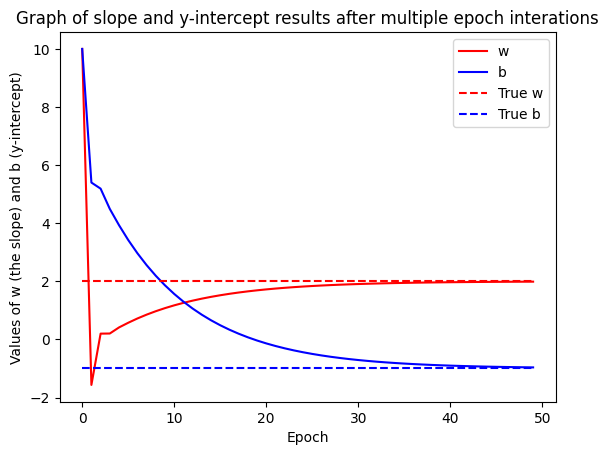

In [26]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.title('Graph of slope and y-intercept results after multiple epoch interations')
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Values of w (the slope) and b (y-intercept)", fontsize = 10)
plt.show()

#### Graph of loss function values

This graph shows how the loss function decreases after every epoch iteration which means that the learning rate helps reduce the loss value and makes the machine learning model accurate.

Text(0, 0.5, 'Mean Squared Error (Loss Value)')

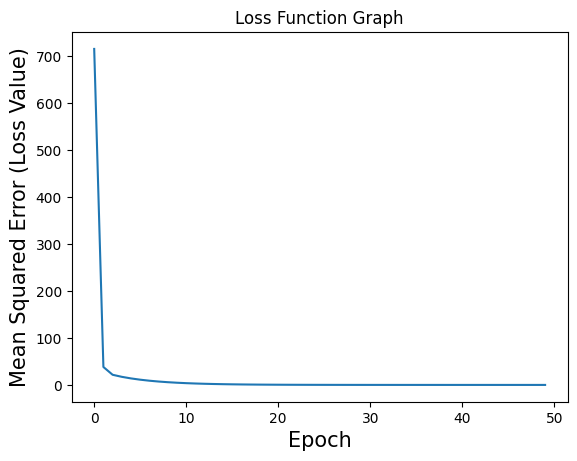

In [ ]:
plt.plot(epochs_iterations, losses)
#plt.plot(y_difference_list, losses)
#plt.plot(new_y_difference, losses)

plt.title('Loss Function Graph')
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Mean Squared Error (Loss Value)",fontsize = 15)
#print(epochs_iterations)
#print(losses)
#print(y_difference_list)

#### Graph of loss function values and predicted and target y difference

This graph shows how the greater the distance between the predicted y ($\hat y_i$) and target y ($y_i$) the higher the value of the loss function. But when the difference between the predicted and targeted y becomes smaller then the loss value decreases. If you notice, when the difference is **zero between the predicted and targeted y** then the loss value is also zero which means that the ML model was able to predict the correct outputs

Text(0, 0.5, 'Mean Squared Error (Loss Value)')

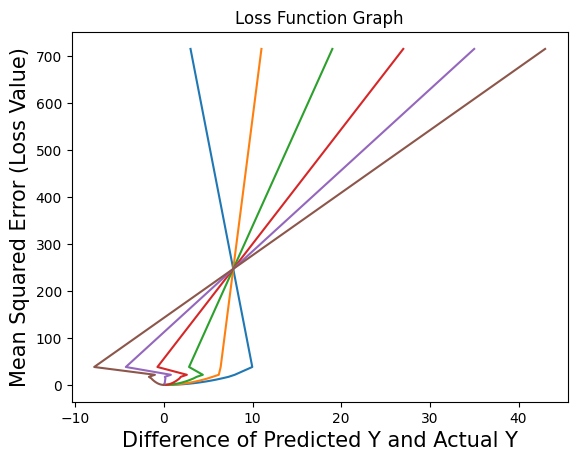

In [28]:
plt.plot(y_difference_list, losses)
#plt.plot(new_y_difference, losses)

plt.title('Loss Function Graph')
plt.xlabel("Difference of Predicted Y and Actual Y", fontsize = 15)
plt.ylabel("Mean Squared Error (Loss Value)",fontsize = 15)
#print(epochs_iterations)
#print(losses)
#print(y_difference_list)

#### Printing the y differences as a dataframe

To better understand why there were five lines in the graph of the differences between the predicted and actual y I decided to print out the values in the `y_difference_list` as a pandas dataframe to better visualise the data.

After visualising the data I realise that each line in the graph represented each column on the dataframe which makes sense since there are 6 values (index of 5) in our input and output data (`xs` and `ys`)

In [35]:
import pandas as pd
new_y_difference = np.array(y_difference_list)

print(pd.DataFrame(new_y_difference).head(5))

          0          1          2          3          4          5
0  3.000000  11.000000  19.000000  27.000000  35.000000  43.000000
1  9.966667   6.400000   2.833333  -0.733335  -4.300003  -7.866670
2  7.991112   6.190001   4.388889   2.587778   0.786667  -1.014444
3  7.289297   5.492334   3.695371   1.898407   0.101444  -1.695518
4  6.520758   4.932956   3.345155   1.757353   0.169552  -1.418250
